<style>
    h1 {
        color: #FFB606;
        text-align: center;
        font-family: 'Arial', sans-serif;
    }
    h2 {
        color: #FFB606;
        font-family: 'Arial', sans-serif;
    }
    .toc {
        border: 2px solid #FFB606;
        padding: 15px;
        background-color: #FFF9E5;
        border-radius: 10px;
        margin-bottom: 20px;
    }
    .toc a {
        text-decoration: none;
        color: #333;
        display: block;
        margin-bottom: 5px;
    }
    .toc a:hover {
        color: #FFB606;
    }
</style>
<h1>Tests Statistiques avec Python</h1>
<h1>Abdelmajid EL HOU, Consultant Data, PhD</h1>
<div class='toc'>
    <h2>Table des Matières</h2>
    <a href='#section1'>1. Tests de Normalité</a>
    <a href='#section1-1'>- Test de Shapiro-Wilk</a>
    <a href='#section1-2'>- Test de D’Agostino K^2</a>
    <a href='#section1-3'>- Test d’Anderson-Darling</a>
    <a href='#section2'>2. Tests de Corrélation</a>
    <a href='#section2-1'>- Coefficient de Corrélation de Pearson</a>
    <a href='#section2-2'>- Corrélation de Spearman</a>
    <a href='#section2-3'>- Corrélation de Kendall</a>
    <a href='#section2-4'>- Test du Chi-Carré</a>
    <a href='#section3'>3. Tests de Stationnarité</a>
    <a href='#section3-1'>- Test de Dickey-Fuller Augmenté</a>
    <a href='#section3-2'>- Test de Kwiatkowski-Phillips-Schmidt-Shin</a>
    <a href='#section4'>4. Tests Paramétriques d’Hypothèses Statistiques</a>
    <a href='#section4-1'>- Test t de Student</a>
    <a href='#section4-2'>- Test t de Student Apparié</a>
    <a href='#section4-3'>- Test d’Analyse de Variance (ANOVA)</a>
    <a href='#section4-4'>- ANOVA à Mesures Répétées</a>
    <a href='#section5'>5. Tests Non Paramétriques d’Hypothèses Statistiques</a>
    <a href='#section5-1'>- Test de Mann-Whitney U</a>
    <a href='#section5-2'>- Test des Rangs Signés de Wilcoxon</a>
    <a href='#section5-3'>- Test de Kruskal-Wallis H</a>
    <a href='#section5-4'>- Test de Friedman</a>
</div>



## <a id='section1'></a>1. Tests de Normalité
Les tests de normalité permettent de vérifier si un échantillon de données suit une distribution normale. Voici quelques tests couramment utilisés.


### <a id='section1-1'></a>Test de Shapiro-Wilk
- **Assomption** : Les observations doivent être indépendantes et identiquement distribuées.
- **Usage** : Tester la normalité d’un petit échantillon.
- **Hypothèses** :
  - **H0** : L'échantillon suit une distribution normale.
  - **H1** : L'échantillon ne suit pas une distribution normale.
- **Performance et limites** : Efficace pour les petits échantillons, sensible aux valeurs aberrantes.
- **Interprétation** :
  - `p > 0.05` : L'échantillon est probablement normal.
  - `p ≤ 0.05` : L'échantillon n'est probablement pas normal.



Statistique=0.895, p=0.193
L'échantillon suit probablement une distribution normale


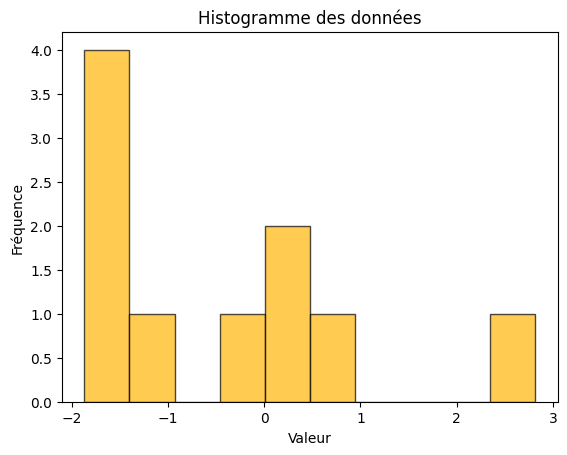

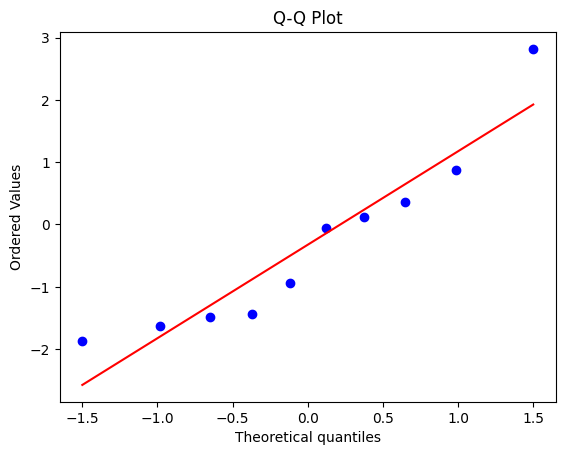

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm, probplot

# Données d'échantillon
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

# Test de Shapiro-Wilk
stat, p = shapiro(data)
print('Statistique=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('L\'échantillon suit probablement une distribution normale')
else:
    print('L\'échantillon ne suit probablement pas une distribution normale')

# Tracé du graphique
plt.hist(data, bins=10, edgecolor='black', alpha=0.7, color="#FFB606")
plt.title('Histogramme des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot
probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


### <a id='section1-2'></a>Test de D’Agostino K^2
- **Assomption** : Les observations doivent être indépendantes.
- **Usage** : Combine l'asymétrie et la kurtosis pour tester la normalité.
- **Hypothèses** :
  - **H0** : L'échantillon suit une distribution normale.
  - **H1** : L'échantillon ne suit pas une distribution normale.
- **Performance et limites** : Performant pour les échantillons moyens à grands.
- **Interprétation** : p > 0.05 : L'échantillon est probablement normal.
p ≤ 0.05 : L'échantillon n'est probablement pas normal.


Statistique=3.392, p=0.183
L'échantillon suit probablement une distribution normale


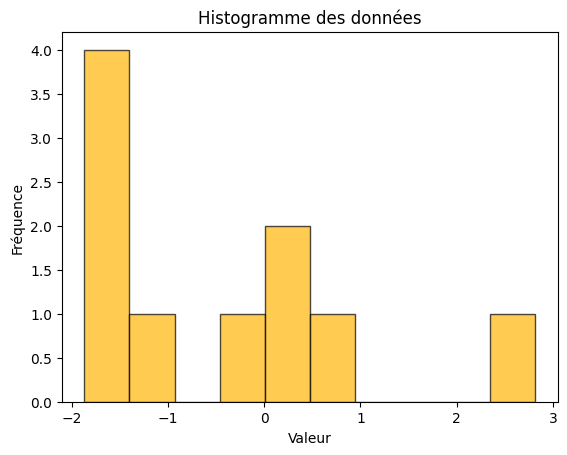

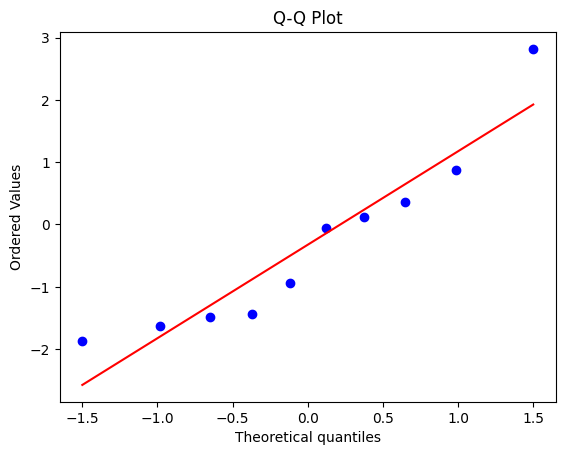

In [32]:
from scipy.stats import normaltest

# Test de D'Agostino K^2
stat, p = normaltest(data)
print('Statistique=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('L\'échantillon suit probablement une distribution normale')
else:
    print('L\'échantillon ne suit probablement pas une distribution normale')

# Histogramme des données
plt.hist(data, bins=10, edgecolor='black', alpha=0.7, color="#FFB606")
plt.title('Histogramme des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot
probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


### <a id='section1-3'></a>Test d’Anderson-Darling
- **Assomption** : Les observations doivent être indépendantes.
- **Usage** : Plus sensible aux queues de la distribution que le test K-S.
- **Hypothèses** :
  - **H0** : L'échantillon suit une distribution normale.
  - **H1** : L'échantillon ne suit pas une distribution normale.
- **Performance et limites** : Très sensible aux écarts dans les queues de la distribution.
- **Interprétation** : Si la statistique dépasse la valeur critique, H0 est rejetée.


Statistique=0.424
L'échantillon suit probablement une distribution normale au niveau de signification 15.0%.
L'échantillon suit probablement une distribution normale au niveau de signification 10.0%.
L'échantillon suit probablement une distribution normale au niveau de signification 5.0%.
L'échantillon suit probablement une distribution normale au niveau de signification 2.5%.
L'échantillon suit probablement une distribution normale au niveau de signification 1.0%.


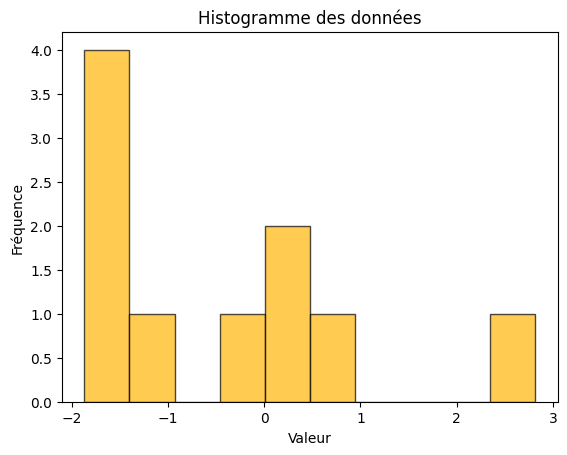

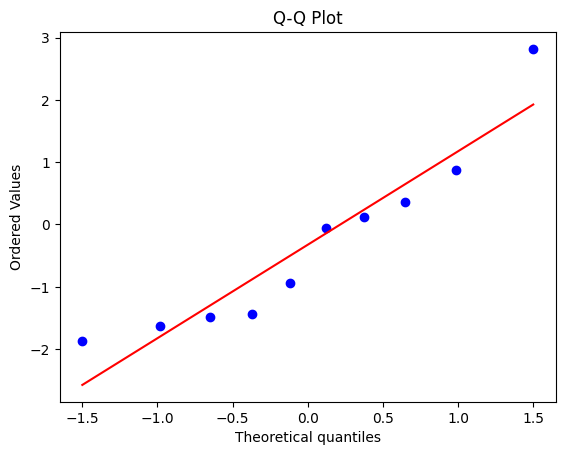

In [33]:
from scipy.stats import anderson

# Test d'Anderson-Darling
result = anderson(data)
print('Statistique=%.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'L\'échantillon suit probablement une distribution normale au niveau de signification {sl}%.')
    else:
        print(f'L\'échantillon ne suit probablement pas une distribution normale au niveau de signification {sl}%.')

# Histogramme des données
plt.hist(data, bins=10, edgecolor='black', alpha=0.7, color="#FFB606")
plt.title('Histogramme des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot
probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


## <a id='section2'></a>2. Tests de Corrélation

### <a id='section2-1'></a>Coefficient de Corrélation de Pearson

**Usage** : Le test de corrélation de Pearson mesure la force et la direction de la relation linéaire entre deux variables continues. 

**Hypothèses** :
- **Hypothèse nulle (H0)** : Il n'y a pas de corrélation linéaire entre les deux variables.
- **Hypothèse alternative (H1)** : Il existe une corrélation linéaire entre les deux variables.

**Performances et limites** :
- **Avantages** : Simple et efficace pour détecter des relations linéaires.
- **Limites** : Ne détecte que les relations linéaires. Si la relation est non linéaire, le test peut ne pas être approprié. Les données doivent être normalement distribuées.

**Interprétation** :
- Un coefficient proche de 1 ou -1 indique une forte corrélation positive ou négative.
- Un coefficient proche de 0 indique une absence de corrélation linéaire.
- Si la valeur p > 0,05, la corrélation n'est pas significative.
- Si la valeur p ≤ 0,05, la corrélation est significative.


Statistique=0.971, p=0.000
Probablement dépendant


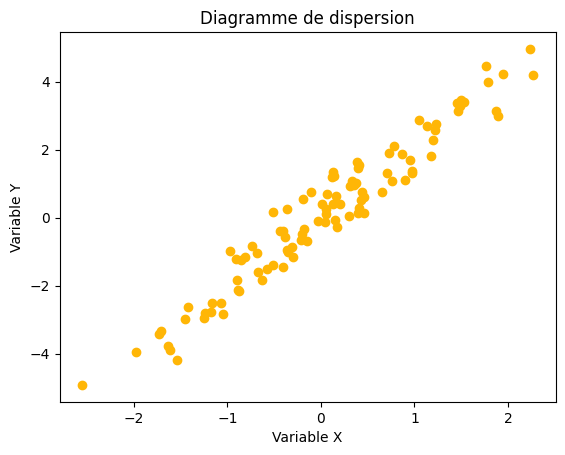

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Génération de données
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 0.5, 100)

# Test de corrélation de Pearson
stat, p = stats.pearsonr(x, y)
print('Statistique=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')

# Visualisation
plt.scatter(x, y, color="#FFB606")
plt.title("Diagramme de dispersion")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.show()


### <a id='section2-2'></a>Corrélation de Spearman

**Usage** : Le test de corrélation de Spearman évalue la relation monotone entre deux variables continues ou ordinales. Il est non paramétrique, donc ne nécessite pas que les données suivent une distribution normale.

**Hypothèses** :
- **Hypothèse nulle (H0)** : Il n'y a pas de corrélation monotone entre les deux variables.
- **Hypothèse alternative (H1)** : Il existe une corrélation monotone entre les deux variables.

**Performances et limites** :
- **Avantages** : Peut détecter des relations monotones, même non linéaires.
- **Limites** : Moins sensible aux petites variations dans les données.

**Interprétation** :
- Un coefficient de Spearman proche de 1 ou -1 indique une forte corrélation monotone positive ou négative.
- Un coefficient proche de 0 indique une absence de corrélation monotone.
- Si la valeur p > 0,05, la corrélation n'est pas significative.
- Si la valeur p ≤ 0,05, la corrélation est significative.


Statistique=0.958, p=0.000
Probablement dépendant


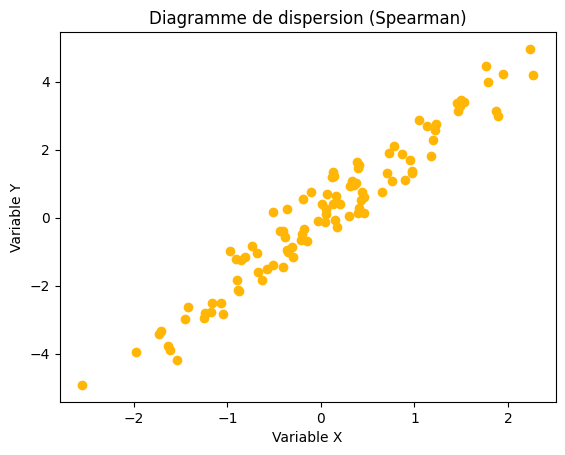

In [35]:
# Test de corrélation de Spearman
stat, p = stats.spearmanr(x, y)
print('Statistique=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')

# Visualisation
plt.scatter(x, y, color="#FFB606")
plt.title("Diagramme de dispersion (Spearman)")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.show()


### <a id='section2-3'></a>Corrélation de Kendall

**Usage** : La corrélation de Kendall est utilisée pour mesurer la force de la relation entre deux variables ordinales ou continues. Elle est particulièrement utile lorsque l'échantillon est petit ou qu'il y a beaucoup de valeurs identiques.

**Hypothèses** :
- **Hypothèse nulle (H0)** : Il n'y a pas de corrélation monotone entre les deux variables.
- **Hypothèse alternative (H1)** : Il existe une corrélation monotone entre les deux variables.

**Performances et limites** :
- **Avantages** : Plus robuste que Spearman pour les échantillons de petite taille ou lorsque les données ont beaucoup de valeurs identiques.
- **Limites** : Moins puissant que Spearman pour des échantillons de grande taille.

**Interprétation** :
- Un coefficient de Kendall proche de 1 ou -1 indique une forte corrélation monotone positive ou négative.
- Un coefficient proche de 0 indique une absence de corrélation monotone.
- Si la valeur p > 0,05, la corrélation n'est pas significative.
- Si la valeur p ≤ 0,05, la corrélation est significative.


Statistique=0.835, p=0.000
Probablement dépendant


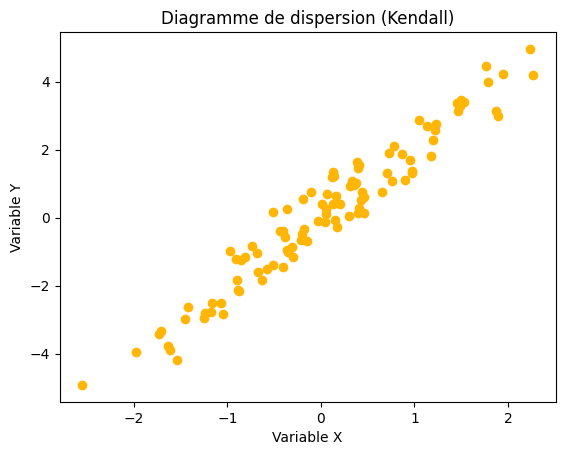

In [36]:
# Test de corrélation de Kendall
stat, p = stats.kendalltau(x, y)
print('Statistique=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')

# Visualisation
plt.scatter(x, y, color="#FFB606")
plt.title("Diagramme de dispersion (Kendall)")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.show()


### <a id='section2-4'></a>Test du Chi-Carré

**Usage** : Le test du Chi-Carré est utilisé pour évaluer l'indépendance entre deux variables catégorielles dans un tableau de contingence.

**Hypothèses** :
- **Hypothèse nulle (H0)** : Les variables sont indépendantes.
- **Hypothèse alternative (H1)** : Les variables sont dépendantes.

**Performances et limites** :
- **Avantages** : Simple à utiliser pour des données catégorielles.
- **Limites** : Les effectifs attendus dans chaque cellule doivent être supérieurs à 5 pour assurer la validité du test.

**Interprétation** :
- Si la valeur p > 0,05, on ne peut pas rejeter l'hypothèse d'indépendance.
- Si la valeur p ≤ 0,05, on rejette l'hypothèse d'indépendance et on conclut que les variables sont dépendantes.
